# Explore the numerical differences between PerMIT and RKZ

- results in translation of PerMIT to RKZ variables: `data/validation/variables_translation.json`

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

PATH_base = "/home/WUR/katz001/PROJECTS/PERMIT_GAS_clean"

In [42]:
''' 
Select features
'''

target = "Conclusion_micro"
percentBoruta = 100


datasetTimepoint = "ENTRY"
fs_entry = pd.read_csv(f"{PATH_base}/results/20_feature_selection/{datasetTimepoint}/CV/{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc.txt", 
                       header=None)[0].tolist()
#print(fs_entry)

datasetTimepoint = "PRESURGERY"
fs_pre = pd.read_csv(f"{PATH_base}/results/20_feature_selection/{datasetTimepoint}/CV/{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc.txt", 
                       header=None)[0].tolist()
#print(fs_pre)

datasetTimepoint = "POSTSURGERY"
fs_post = pd.read_csv(f"{PATH_base}/results/20_feature_selection/{datasetTimepoint}/CV/{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc.txt", 
                       header=None)[0].tolist()
#print(fs_post)

datasetTimepoint = "BL"
fs_bl = pd.read_csv(f"{PATH_base}/results/20_feature_selection/{datasetTimepoint}/CV/{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc.txt", 
                       header=None)[0].tolist()
#print(fs_bl)


fs_overlap = list(set(fs_entry + fs_pre + fs_post + fs_bl))
print(fs_overlap)

['SURGERY_BEFORE', 'hgb_preop', 'NA_max_BL', 'AGE', 'glucose_BL', 'lactate_BL', 'UPPER_ARM_ARRIVAL', 'preadmission_creatinine', 'creatinine_preop', 'creatinine_BL', 'platelet_BL', 'ANOGENITAL_ARRIVAL', 'sample_site_1', 'DIABETES', 'sys_bp_low_bl', 'LOWER_ARM_ARRIVAL']


# Load High-quality dataset (216 patients)

In [43]:
df_prim = pd.read_csv("../../data/validation/raw_data/Datafile_NSTI_216primair_tavGASpredictions.csv", na_values=" ")

### recode missing measurements as missing values
na_other = {-99:np.nan,
            -98:np.nan,
            -97:np.nan,
            -96:np.nan,
            -95:np.nan,
            2:np.nan}
df_prim.replace(na_other, inplace=True)

df_prim['bodypart_adm_pres#Lower_arm'] = df_prim.loc[:,['bodypart_adm_pres#Left_Lower_arm',
                                                        'bodypart_adm_pres#Right_Lower_arm']].max(axis=1)

df_prim['bodypart_adm_pres#Upper_arm'] = df_prim.loc[:,['bodypart_adm_pres#Left_Upper_arm',
                                                        'bodypart_adm_pres#Right_Upper_arm']].max(axis=1)

''' 
encoded and only variables in ENTRY & PRE
'''

vars_val_enc = [
 'GAS_yes_no',
 'age_pres',
 'Diabetes_M',
 'surg_area_NSTI',
 'bodypart_adm_pres#Lower_arm',
 'bodypart_adm_pres#Anogenital_region',
 'bodypart_adm_pres#Upper_arm',
 'Adm_pres_Creat',
 'Adm_pres_Creat_alt',
 'Adm_pres_Hb',
 'Adm_pres_Hb_alt',
 ]


# Compare distribution: PerMIT & RKZ

- use `_alt` variables or not? 

In [44]:
def plot_compare_bar(var_permit, var_rkz, title=""):
    fig, ax = plt.subplots(1,2)
    df_permit[var_permit].value_counts(normalize=True).plot.bar(ax=ax[0])
    df_rkz[var_rkz].value_counts(normalize=True).plot.bar(ax=ax[1], color="green")
    ax[0].set_ylim(0,1)
    ax[1].set_ylim(0,1)
    ax[0].bar_label(ax[0].containers[0], fmt='%.2f')
    ax[1].bar_label(ax[1].containers[0], fmt='%.2f')
    fig.suptitle(title)
    return 


def plot_compare_density(var_permit, var_rkz, title=""):
    df_permit[var_permit].plot.density(bw_method=0.2)
    df_rkz[var_rkz].plot.density(color="green", bw_method=0.2)
    plt.title(title)
    return

In [45]:
fs_pre_target = fs_pre.copy()
fs_pre_target.append(target)

''' Permit '''
df_permit = pd.read_csv(f"{PATH_base}/results/10_preprocessed/PRESURGERY_{target}_preprocessed.csv", index_col=0)\
            .loc[:, fs_pre_target]
print(df_permit.columns)

''' GAS '''
df_rkz = df_prim.loc[:, vars_val_enc]
print(df_rkz.columns)

Index(['creatinine_preop', 'hgb_preop', 'UPPER_ARM_ARRIVAL',
       'LOWER_ARM_ARRIVAL', 'ANOGENITAL_ARRIVAL', 'DIABETES', 'SURGERY_BEFORE',
       'AGE', 'Conclusion_micro'],
      dtype='object')
Index(['GAS_yes_no', 'age_pres', 'Diabetes_M', 'surg_area_NSTI',
       'bodypart_adm_pres#Lower_arm', 'bodypart_adm_pres#Anogenital_region',
       'bodypart_adm_pres#Upper_arm', 'Adm_pres_Creat', 'Adm_pres_Creat_alt',
       'Adm_pres_Hb', 'Adm_pres_Hb_alt'],
      dtype='object')


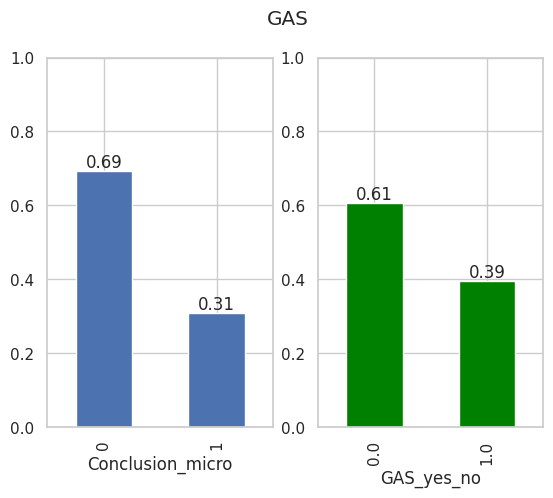

In [46]:
'''
GAS 
'''
plot_compare_bar(var_permit="Conclusion_micro", 
            var_rkz="GAS_yes_no", 
            title="GAS")

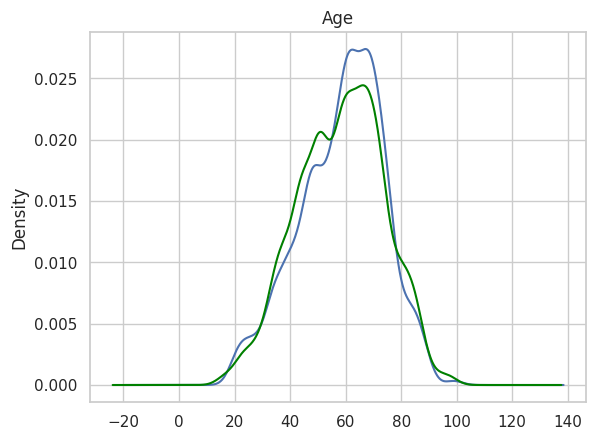

In [47]:
'''
Age
'''
plot_compare_density(var_permit="AGE",
                     var_rkz="age_pres", 
                     title="Age")


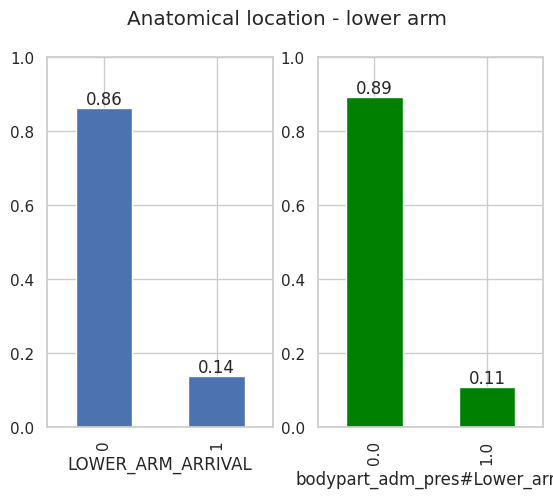

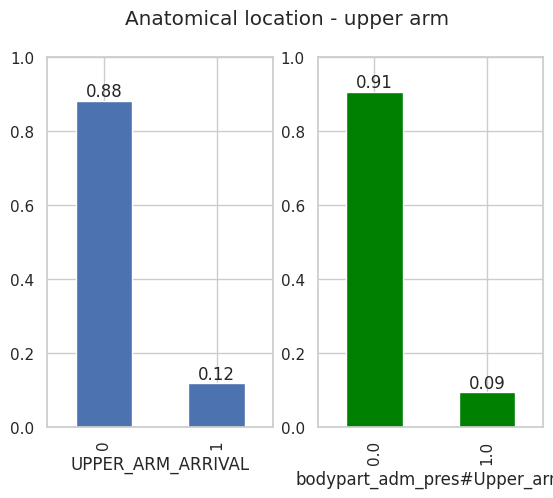

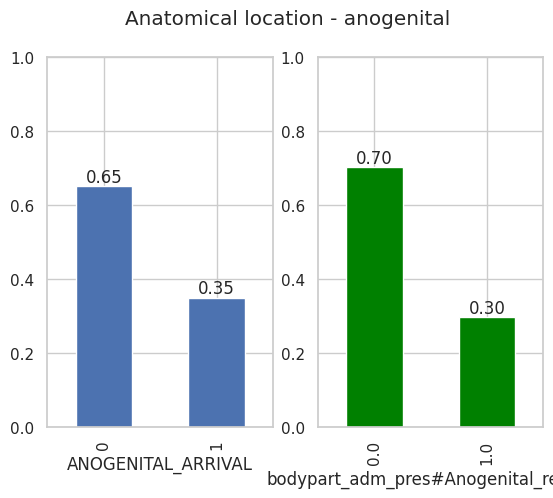

In [48]:
'''
Anatomical location 
'''
plot_compare_bar(var_permit="LOWER_ARM_ARRIVAL", 
                 var_rkz="bodypart_adm_pres#Lower_arm", 
                 title="Anatomical location - lower arm")

plot_compare_bar(var_permit="UPPER_ARM_ARRIVAL", 
                 var_rkz="bodypart_adm_pres#Upper_arm", 
                 title="Anatomical location - upper arm")

plot_compare_bar(var_permit="ANOGENITAL_ARRIVAL", 
                 var_rkz="bodypart_adm_pres#Anogenital_region", 
                 title="Anatomical location - anogenital")


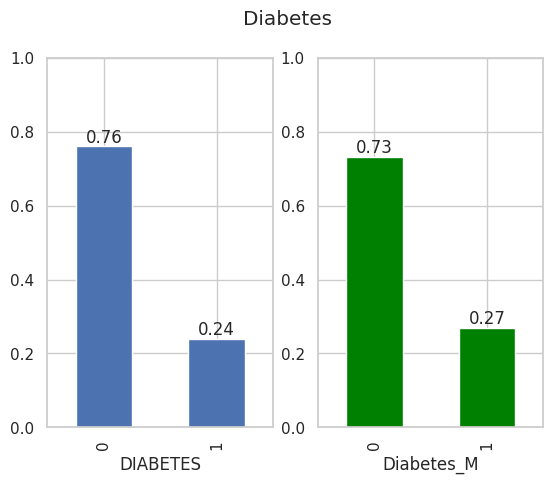

In [49]:
''' 
DIABETES
'''

plot_compare_bar(var_permit="DIABETES",
                 var_rkz="Diabetes_M", 
                 title="Diabetes")

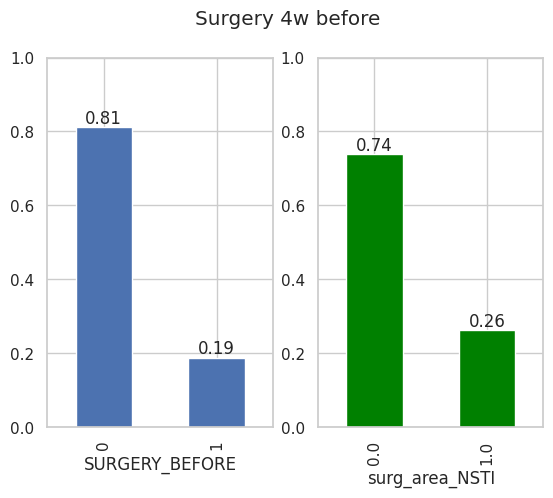

In [50]:
''' 
SURGERY_BEFORE
'''
plot_compare_bar(var_permit="SURGERY_BEFORE",
                 var_rkz="surg_area_NSTI", 
                 title="Surgery 4w before")

161.17480719794344
153.74


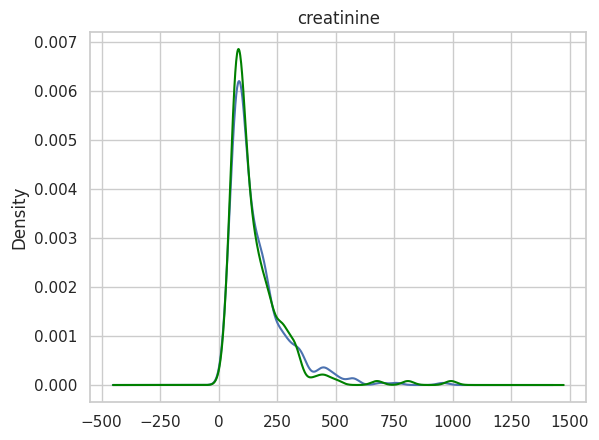

In [51]:
''' 
creatinine
'''
plot_compare_density(var_permit="creatinine_preop", 
                     var_rkz="Adm_pres_Creat", 
                     title="creatinine")

print(df_permit["creatinine_preop"].mean())
#print(df_rkz["Adm_pres_Creat_alt"].mean())
print(df_rkz["Adm_pres_Creat"].mean())


11.428421188630491
12.696868686868688


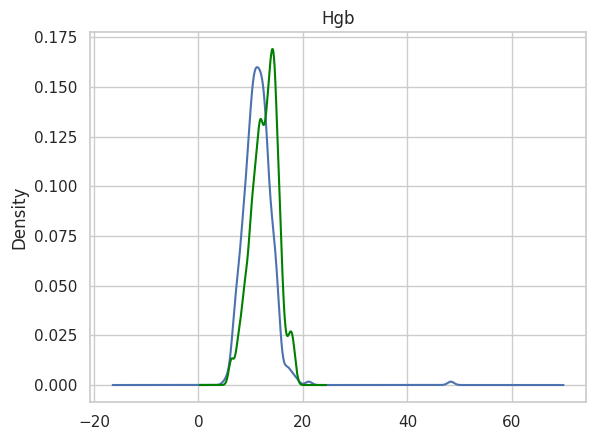

In [52]:
''' 
hgb --> conversion necessary?

Hemoglobin (mmol/L) = Hemoglobin (g/dL) × 0.6206

Permit: g/L?

'''
plot_compare_density(var_permit="hgb_preop", 
                     var_rkz="Adm_pres_Hb_alt", 
                     title="Hgb")

print(df_permit["hgb_preop"].mean())
print(df_rkz["Adm_pres_Hb_alt"].mean())
#print(df_rkz["Adm_pres_Hb"].mean())
